# Modelo Preditivo para Marketing Digital

## Introdução
Este projeto tem como objetivo criar um modelo preditivo para prever o valor gasto pelo usuário, além de antecipar o retorno de uma campanha e otimizar as estratégias de marketing utilizando os dados reais do Google Merchandising Store.

## Objetivo
Este projeto tem como objetivo aplicar Machine Learning no Marketing Digital, entender os conceitos de dados de comportamento online e criar variáveis de usuários em sites.

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

## Carregando os dados

In [2]:
df = pd.read_csv('Dados/train.csv')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


## Análise exploratória

### Verificando o tamanho do dataframe

In [3]:
print(f'Dataframe contém {df.shape[0]} linhas e {df.shape[1]} colunas.')

Dataframe contém 12283 linhas e 12 colunas.


### Verificando os tipos de dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  int64 
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  uint64
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 1.1+ MB


### Verificando a quantidade de usuários únicos

In [5]:
print(f'Quantidade de usuários únicos: {len(df["fullVisitorId"].unique())}')

Quantidade de usuários únicos: 9996


### Tratando o tipo das colunas

In [6]:
df = pd.read_csv('Dados/train.csv', dtype={'date': object,'fullVisitorId': object, 'VisitId': object})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  object
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  object
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


### Transformando os valores em coluna do dataframe

In [7]:
# Criando dicionarios com as colunas que contém dados em formato json
dicionarios = ['device', 'geoNetwork', 'totals', 'trafficSource']

# Criando novas colunas no dataframe com os dados em formato json
for coluna in dicionarios:
    df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""n

### Excluindo as colunas

In [8]:
df.drop(dicionarios, axis=1, inplace=True)
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,NaN,NaN,(not set),google,organic,(not provided),{'criteriaParamet

In [9]:
# Excluindo coluna adwordsClickInfo.
df.drop('adwordsClickInfo', axis=1, inplace=True)

## Limpeza dos dados

### Verificando os valores únicos de cada coluna

Podemos notar que algumas colunas possuem somente 1 valor único. Essas colunas não trazem nenhuma informação valiosa para nosso conjunto de dados, sendo assim, criamos um código que verifica se a coluna possui somente 1 valor único para excluirmos essa coluna.

In [10]:
for coluna in df.columns:
    print(f'{coluna}: {len(df[coluna].unique())}')

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2


In [11]:
# Lista de colunas com apenas um valor único
coluna_na = []

# Verificando colunas com apenas um valor único.
for coluna in df.columns:
    if len(df[coluna].unique()) == 1:
        coluna_na.append(coluna)

# Excluindo colunas com apenas um valor único.
df.drop(coluna_na, axis=1, inplace=True)

df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,1,1,1,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,1,1,1,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,1,1,1,1,NaN,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,1,1,1,NaN,NaN,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,5,4,NaN,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [12]:
print(f'Dataframe contém {df.shape[0]} linhas e {df.shape[1]} colunas.')

Dataframe contém 12283 linhas e 31 colunas.


### Corrigindo variáveis quantitativas

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   channelGrouping     12283 non-null  object
 1   date                12283 non-null  object
 2   fullVisitorId       12283 non-null  object
 3   sessionId           12283 non-null  object
 4   visitId             12283 non-null  int64 
 5   visitNumber         12283 non-null  int64 
 6   visitStartTime      12283 non-null  int64 
 7   browser             12283 non-null  object
 8   operatingSystem     12283 non-null  object
 9   isMobile            12283 non-null  bool  
 10  deviceCategory      12283 non-null  object
 11  continent           12283 non-null  object
 12  subContinent        12283 non-null  object
 13  country             12283 non-null  object
 14  region              12283 non-null  object
 15  metro               12283 non-null  object
 16  city                12

In [14]:
var_quantitativas = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

for coluna in var_quantitativas:
    df[coluna] = pd.to_numeric(df[coluna])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     12283 non-null  object 
 1   date                12283 non-null  object 
 2   fullVisitorId       12283 non-null  object 
 3   sessionId           12283 non-null  object 
 4   visitId             12283 non-null  int64  
 5   visitNumber         12283 non-null  int64  
 6   visitStartTime      12283 non-null  int64  
 7   browser             12283 non-null  object 
 8   operatingSystem     12283 non-null  object 
 9   isMobile            12283 non-null  bool   
 10  deviceCategory      12283 non-null  object 
 11  continent           12283 non-null  object 
 12  subContinent        12283 non-null  object 
 13  country             12283 non-null  object 
 14  region              12283 non-null  object 
 15  metro               12283 non-null  object 
 16  city

### Tratando variável resposta

A quantidade de linhas com dados nulos na coluna de resposta transactionRevenue serão substituídas por valor 0, pois trata-se de usuários que não realizou compra. Ainda, realizamos uma multiplicação para voltar esse valor para o formato real.

In [15]:
# Verificando valores nulos da coluna transactionRevenue.
df['transactionRevenue'].isna().sum()

12119

In [16]:
# Preenchendo valores nulos da coluna transactionRevenue com 0.
df['transactionRevenue'].fillna(0, inplace=True)

In [17]:
df['transactionRevenue'] = df['transactionRevenue'] / 1000000
df['transactionRevenue'].value_counts()

transactionRevenue
0.00     12119
13.59        3
33.59        3
19.19        3
27.19        2
         ...  
24.73        1
6.99         1
14.48        1
95.18        1
25.24        1
Name: count, Length: 147, dtype: int64

### Criando nova dataframe com quantidade de acessos por usuário

Sabendo que a quantidade de visitas na página é maior do que a quantidade de usuários, agrupamos os dados por id de usuário para mostrar os dados de cada usuário.

In [18]:
df_quant = df.groupby('fullVisitorId', as_index=False)[var_quantitativas].sum()

df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [19]:
print(f'Dataframe contém {df_quant.shape[0]} linhas e {df_quant.shape[1]} colunas.')

Dataframe contém 9997 linhas e 6 colunas.


## Criação do modelo

### Separando os dados de feature e target

In [20]:
X = df_quant.drop('transactionRevenue', axis=1)
y = df_quant['transactionRevenue'].copy()

### Separando os dados de treino e teste

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Criando o modelo de regressão linear

In [22]:
# Instanciando o modelo.
modelo_lr = LinearRegression()

# Treinando o modelo.
modelo_lr.fit(X_train, y_train)

# Fazendo previsões.
y_pred = modelo_lr.predict(X_test)

### Comparando os resultados

Para avaliar os resultados, criamos um data frame para visualizar melhor. Podemos notar que o modelo não está realizando predições de forma eficiente.

In [23]:
resultados = pd.DataFrame()

# O que foi gasto de fato.
resultados['revenue'] = y_test

# Previsão de gastos.
resultados['revenue_predict'] = y_pred

# Erro da previsão.
resultados['erro'] = y_pred - y_test

resultados.head()

,revenue,revenue_predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


Para avaliar a performance do modelo utilizamos a raiz do erro médio quadrático e gráficos.

In [24]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

28.412073660366516


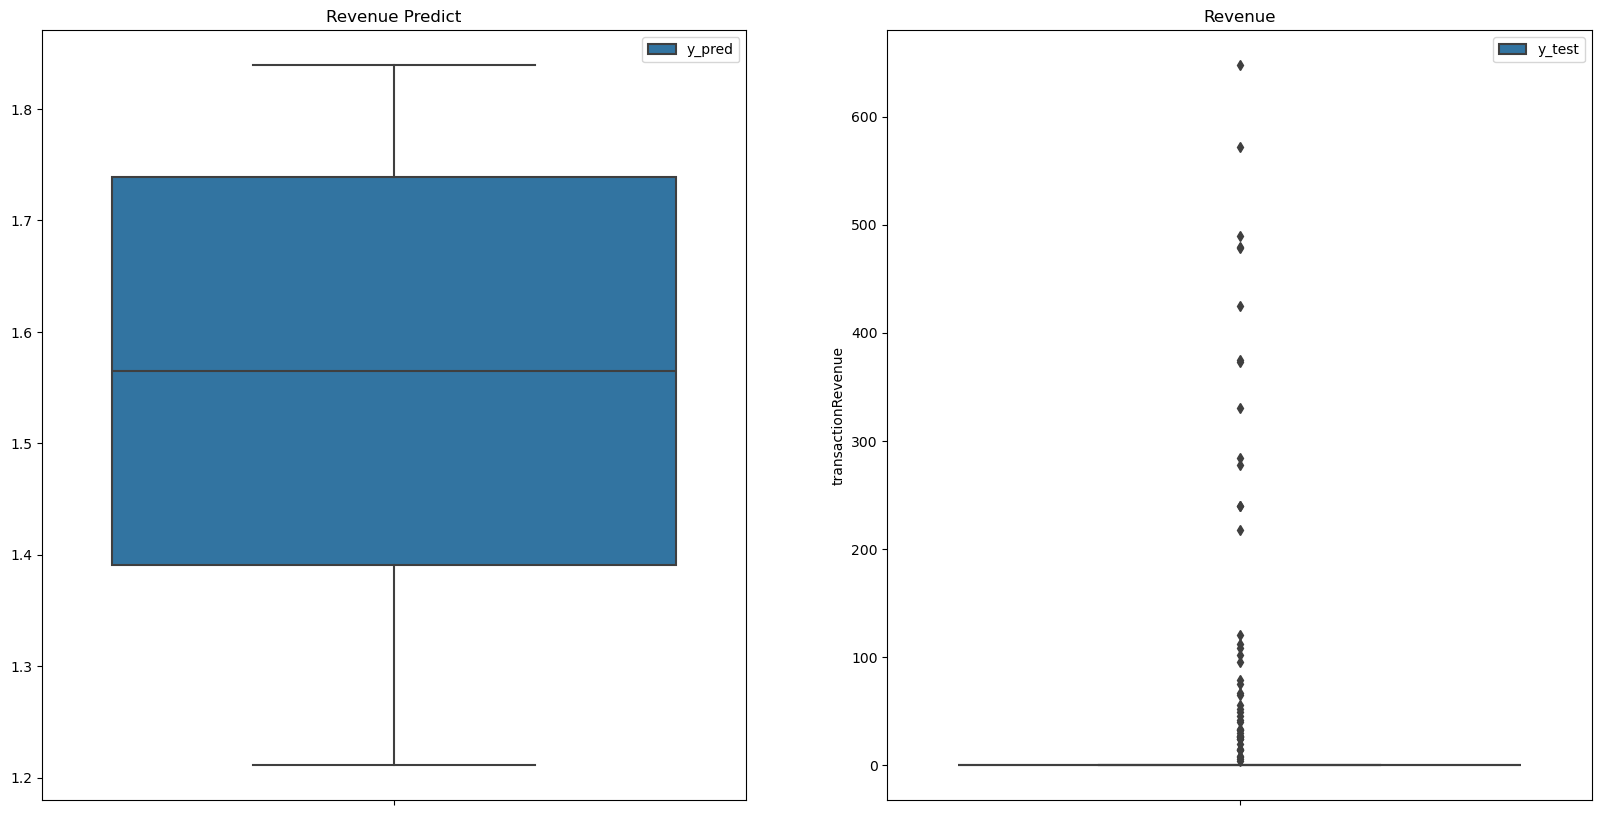

In [25]:
# Criando os gráficos.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(y=y_test, ax=ax[1]).set_title('Revenue')
sns.boxplot(y=y_pred, ax=ax[0]).set_title('Revenue Predict')

ax[1].legend(['y_test'])
ax[0].legend(['y_pred'])

plt.show()

Ao comparar os dois gráficos notamos uma grande concentração no zero e vários outliers nos dados de teste, enquanto no gráfico da previsão realizada os dados estão bem distribuídos, o que nos informa que o modelo está errando mais do que o desvio natural da base.

### Criando dataframe com os dados da última visita por id

In [26]:
# Agrupando por usuário.
ultima_visita = df.groupby('fullVisitorId', as_index=False)

# Pegando a última visita de cada usuário.
ultima_visita = ultima_visita['visitNumber'].max()
ultima_visita.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [27]:
# Removendo duplicatas.
ultima_visita_unico = df.drop_duplicates(subset=['fullVisitorId', 'visitNumber'], keep='last')
ultima_visita_unico

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,1,1,1.0,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,1,1,1.0,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,1,1,1.0,1.0,0.0,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,1,1,1.0,NaN,0.0,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,5,4,NaN,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,20170104,7330357551242339916,7330357551242339916_1483540608,1483540608,1,1483540608,Chrome,Windows,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/pl/,NaN,NaN
12279,Social,20170104,696320405243257438,0696320405243257438_1483580407,1483580407,1,1483580407,Chrome,Android,True,mobile,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,vodafone-ip.de,1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
12280,Social,20170104,5437703324867866371,5437703324867866371_1483592122,1483592122,1,1483592122,Chrome,Linux,False,desktop,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
12281,Social,20170104,8869363093179043393,8869363093179043393_1483601927,1483601927,2,1483601927,Chrome,Android,True,mobile,Europe,Northern Europe,Lithuania,not available in demo dataset,not available in demo dataset,not available in demo dataset,cgates.lt,2,2,NaN,NaN,0.0,(not set),youtube.com,referral,NaN,True,/yt/about/lt/,NaN,NaN


#### Juntando os dataframes

In [28]:
# Juntando os dataframes.
visitas = pd.merge(ultima_visita, ultima_visita_unico, left_on=['fullVisitorId', 'visitNumber'], right_on=['fullVisitorId', 'visitNumber'], how='left')
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),4,3,NaN,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,2,2,NaN,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,2,2,NaN,NaN,0.0,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


### Criando dataframe com os dados da primeira visita por id

In [29]:
# Agrupando por usuário.
primeira_visita = df.groupby('fullVisitorId', as_index=False)

# Pegando a última visita de cada usuário.
primeira_visita = primeira_visita['visitNumber'].min()

# Settando o index.
primeira_visita.set_index('fullVisitorId', inplace=True)
primeira_visita.head()

,visitNumber
fullVisitorId,
0002365800130207040,1
0010286039787739137,1
0011056874471185769,1
0014443856125569702,1
0017260116665815114,6


#### Juntando os dataframes

In [30]:
visitas = visitas.join(primeira_visita, how='left', on='fullVisitorId', rsuffix='_primeira')
visitas = pd.merge(visitas, ultima_visita_unico, left_on=['fullVisitorId', 'visitNumber_primeira'],
                   right_on=['fullVisitorId', 'visitNumber'], how='left', suffixes=['_ultima', '_primeira'])
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,hits_ultima,pageviews_ultima,bounces_ultima,newVisits_ultima,transactionRevenue_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,sessionId_primeira,visitId_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,hits_primeira,pageviews_primeira,bounces_primeira,newVisits_primeira,transactionRevenue_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),4,3,NaN,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),4,3,NaN,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,2,2,NaN,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,2,2,NaN,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,1,1,1.0,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,2,2,NaN,NaN,0.0,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not a

### Tratando as colunas: Exclusão, criação e tratamento

In [31]:
# Excluindo primeiras e úlrimas colunas quantitativas.
for coluna in var_quantitativas:
    visitas.drop(coluna + '_ultima', axis=1, inplace=True)
    visitas.drop(coluna + '_primeira', axis=1, inplace=True)

visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,sessionId_primeira,visitId_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [32]:
# Excluindo colunas com ids que não serão utilizados.
ids = ['sessionId_ultima', 'visitId_ultima', 'sessionId_primeira', 'visitId_primeira']
visitas.drop(ids, axis=1, inplace=True)

visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [33]:
# Excluindo as primeiras colunas com informações geográficas.
geo = ['city_primeira', 'continent_primeira', 'country_primeira', 'metro_primeira', 'region_primeira', 'subContinent_primeira', 'networkDomain_primeira',]
visitas.drop(geo, axis=1, inplace=True)

visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


### Criando algumas variáveis

In [34]:
# Juntando os dataframes.
visitas = pd.merge(visitas, df_quant, left_on='fullVisitorId', right_on='fullVisitorId', how='left')
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0


In [35]:
# Criando uma coluna com a diferença de tempo entre a primeira e última visita.
visitas['tempo_dif'] = visitas['visitStartTime_ultima'] - visitas['visitStartTime_primeira']

# Criando uma coluna com a quantidade de visitas.
visits = df.groupby('fullVisitorId', as_index=False).count().visitNumber.values
visitas['visits'] = visits

In [36]:
# Criando coluna com o ano, mês e dia da última visita.
visitas['ano_ultima'] = pd.to_numeric([data[0:4] for data in visitas.date_ultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])

# Criando coluna com o ano, mês e dia da primeira visita.
visitas['ano_primeira'] = pd.to_numeric([data[0:4] for data in visitas.date_primeira])
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas.date_primeira])
visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in visitas.date_primeira])

In [37]:
# Excluindo a coluna.
visitas.drop('fullVisitorId', axis=1, inplace=True)

In [38]:
# Separando as colunas qualitativas.
var_qualitativas = visitas.dtypes[visitas.dtypes == 'object'].keys()

## Criação do modelo pós-tratamento

### Separando os features e target

In [39]:
X = visitas.drop('transactionRevenue', axis=1)
y = visitas['transactionRevenue'].copy()

### Aplicando LabelEncoder

In [40]:
for coluna in var_qualitativas:
    lbl = LabelEncoder()
    strings = list(X[coluna].values.astype('str'))
    lbl.fit(strings)
    X[coluna] = lbl.transform(strings)

### Criando modelo

In [41]:
# Separando os dados de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciando o modelo.
modelo_lr = LinearRegression()

# Treinando o modelo.
modelo_lr.fit(X_train, y_train)

# Fazendo previsões.
y_pred = modelo_lr.predict(X_test)

# Se o valor for menor que 0, substitui por 0.
y_pred[y_pred < 0] = 0

### Comparando os resultados

Ao analisar os resultados abaixo, notamos que o modelo não tem mais o mesmo comportamento padrão e temos um modelo em que os usuários gastam mais. Em alguns chegamos bem perto do previsto.

O modelo teve uma melhora, considerando que usamos o desvio padrão como medição, que agora está mais próximo. Nosso modelo está representando muito melhor a distribuição na base de dados em comparação com o modelo criado anteriormente.

In [42]:
resultados = pd.DataFrame()

# O que foi gasto de fato.
resultados['revenue'] = y_test

# Previsão de gastos.
resultados['revenue_predict'] = y_pred

# Erro da previsão.
resultados['erro'] = y_pred - y_test

resultados.head()

,revenue,revenue_predict,erro
4122,0.0,0.014411,0.014411
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.425387,0.425387
6391,0.0,0.000000,0.000000


In [43]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

25.039065930803897


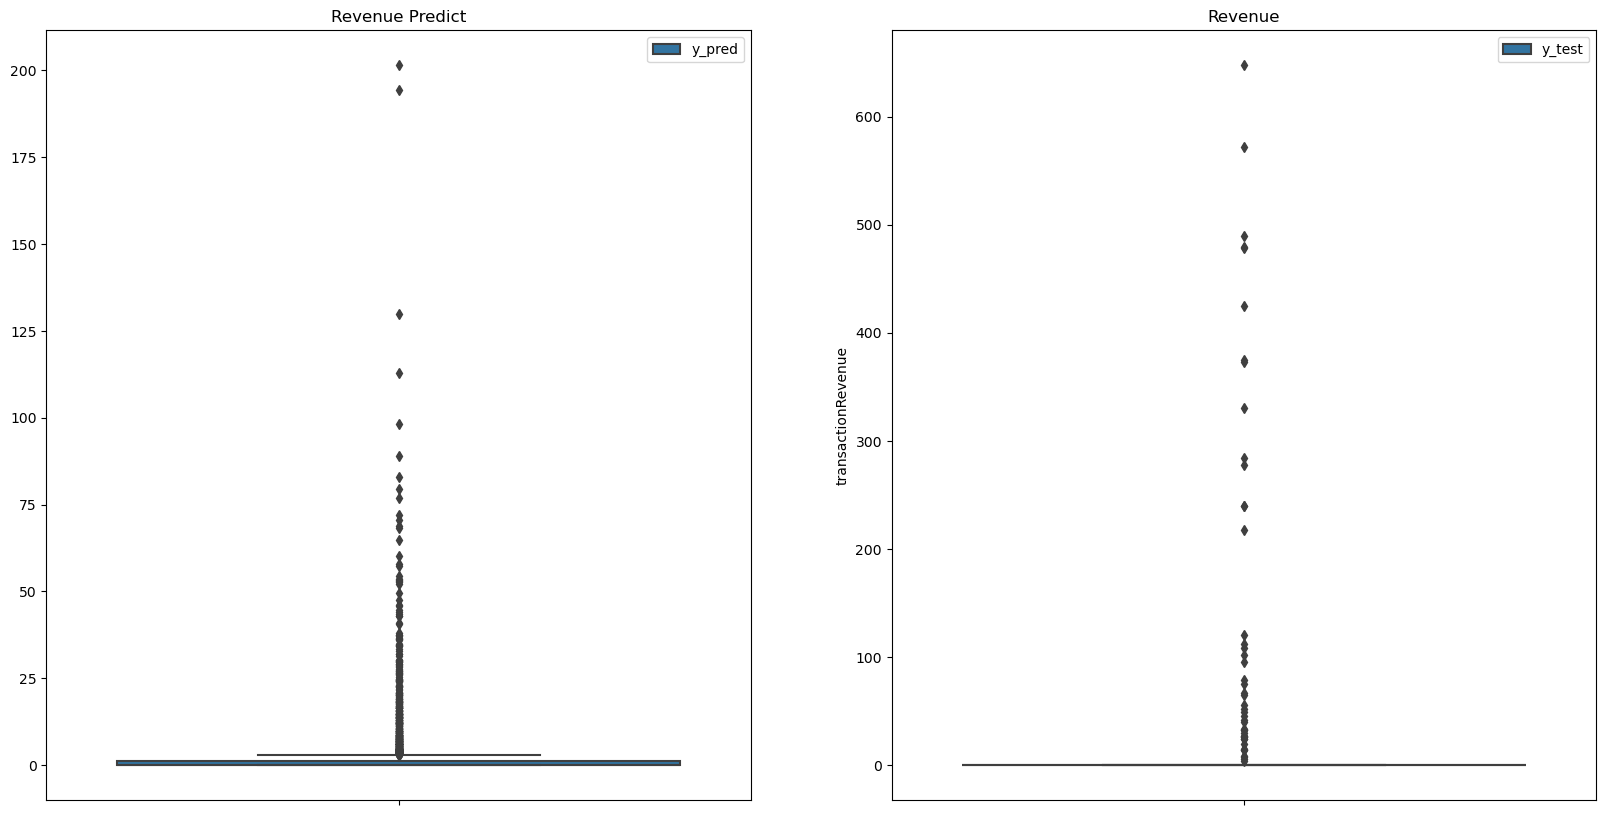

In [44]:
# Criando os gráficos.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(y=y_test, ax=ax[1]).set_title('Revenue')
sns.boxplot(y=y_pred, ax=ax[0]).set_title('Revenue Predict')

ax[1].legend(['y_test'])
ax[0].legend(['y_pred'])

plt.show()

## Treinando um gradient boosting

In [45]:
# Instanciando o modelo.
modelo_gbr = GradientBoostingRegressor(random_state=42)

# Treinando o modelo.
modelo_gbr.fit(X_train, y_train)

# Fazendo previsões.
modelo_gbr_pred = modelo_gbr.predict(X_test)

# Se o valor for menor que 0, substitui por 0.
modelo_gbr_pred[modelo_gbr_pred < 0] = 0

### Comparando os resultados

Ao analisar os resultados abaixo, podemos notar que a previsão está mais próximo dos dados de teste. 
O modelo é razoável para colocar em produção, lembrando do desafio que é conseguir prever quanto um usuário que entra no site vai gastar, porém ainda podemos melhorar as métricas.

In [46]:
resultados = pd.DataFrame()

# O que foi gasto de fato.
resultados['revenue'] = y_test

# Previsão de gastos.
resultados['revenue_predict'] = modelo_gbr_pred

# Erro da previsão.
resultados['erro'] = modelo_gbr_pred - y_test

resultados.head()

,revenue,revenue_predict,erro
4122,0.0,0.061982,0.061982
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.000000,0.000000
6391,0.0,0.038259,0.038259


In [47]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

25.039065930803897


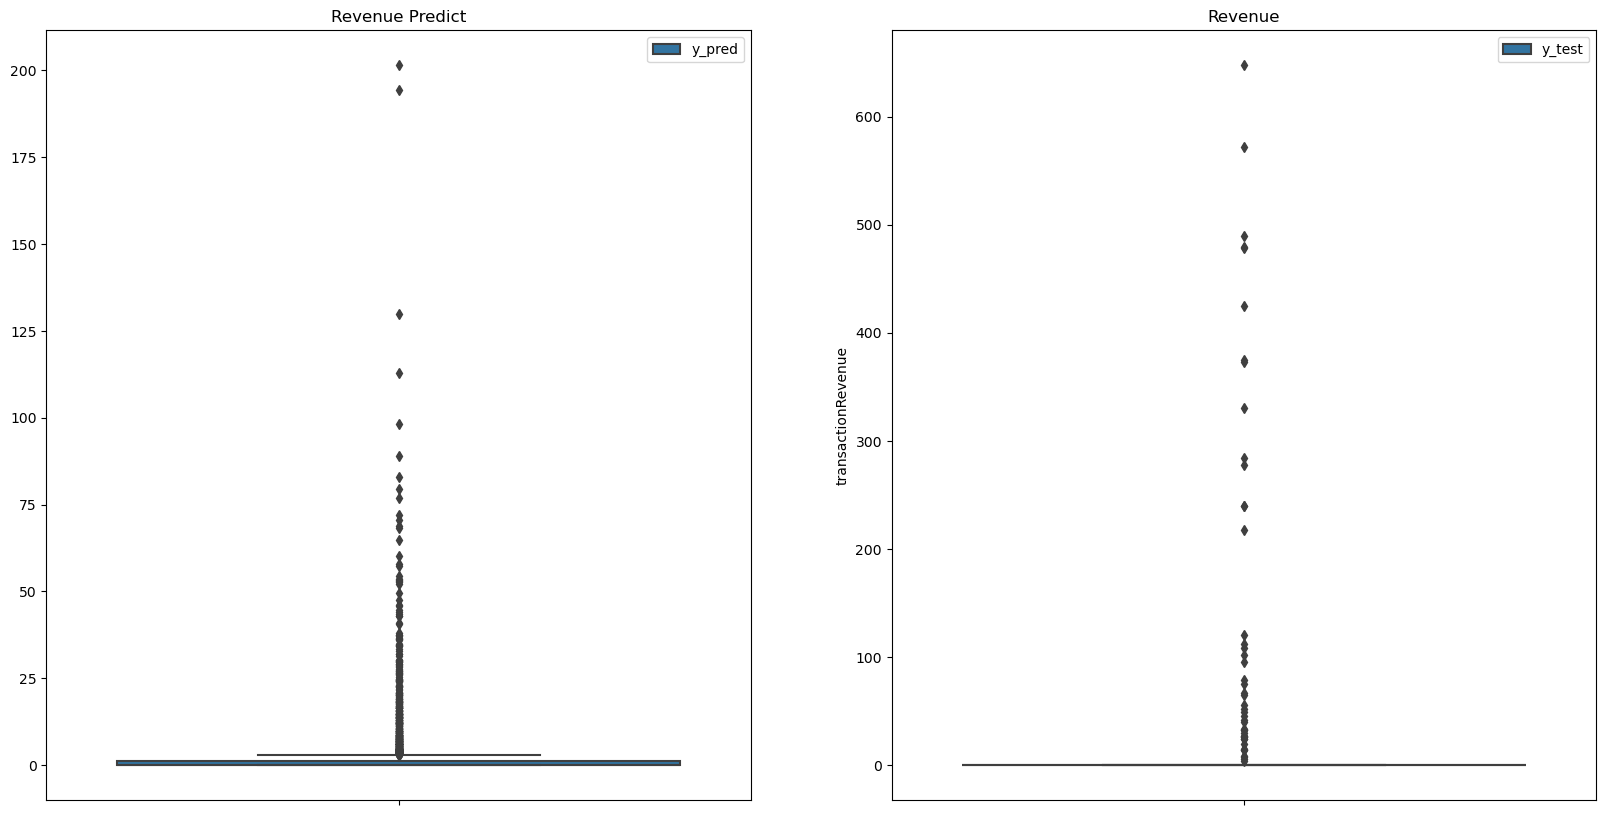

In [48]:
# Criando os gráficos.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(y=y_test, ax=ax[1]).set_title('Revenue')
sns.boxplot(y=y_pred, ax=ax[0]).set_title('Revenue Predict')

ax[1].legend(['y_test'])
ax[0].legend(['y_pred'])

plt.show()

## Alteração de problema

Prever o valor gasto por cada usuário é um problema complexo, sendo assim, invés de prever o valor gasto, tentamos prever se o usuário gastou ou não.

### Alterando o variável de resposta (y)

In [49]:
# Alterando os valores de y_train e y_test para 0 e 1.
y_train.values[y_train.values <= 0] = 0
y_train.values[y_train.values > 0] = 1

y_test.values[y_test.values <= 0] = 0
y_test.values[y_test.values > 0] = 1

### Treinando o modelo de classificação

In [50]:
# Instanciando o modelo.
modelo_gbc = GradientBoostingClassifier(random_state=42)

# Treinando o modelo.
modelo_gbc.fit(X_train, y_train)

# Fazendo previsões.
modelo_gbc_pred = modelo_gbc.predict(X_test)

### Analisando o resultado

Por nossos dados serem desbalanceado, podemos notar que acertamos 99% das vezes quando o usuário não gastou, que é array 2940, só que os usuários que gastaram acertamos apenas 54% das vezes, significa que estamos acertando muito pouco para os usuários que gastaram, o que nos mostra a possibilidade do performance do modelo de regressão não ter sido bom.

In [51]:
# Criando a matriz de confusão.
confusion_matrix(y_test, modelo_gbc_pred)


array([[2940,   13],
       [  32,   15]], dtype=int64)

In [52]:
# Imprimindo o classification report.
print(classification_report(y_test, modelo_gbc_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2953
         1.0       0.54      0.32      0.40        47

    accuracy                           0.98      3000
   macro avg       0.76      0.66      0.70      3000
weighted avg       0.98      0.98      0.98      3000

